In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## LOADING FILE

In [2]:
df=pd.read_csv("Strokesdataset.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


<AxesSubplot:>

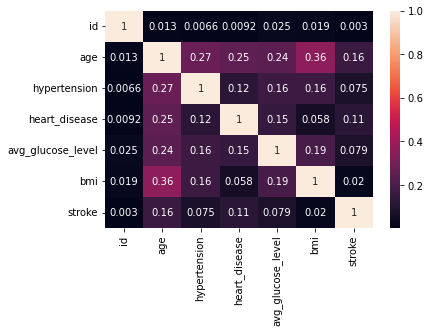

In [4]:
corr=df.corr()

sns.heatmap(corr,annot=True)

In [5]:
df.stroke.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [6]:
df.ever_married.value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

In [7]:
df.smoking_status.value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [8]:
df.work_type.value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [9]:
df.Residence_type.value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

In [10]:
mean=df.bmi.mean()

In [11]:
df["bmi"].isnull().sum()

1462

In [12]:
df1=df.copy()

In [13]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## DATA CLEANING

In [14]:
df1["bmi"]=df1.bmi.fillna(value=mean)
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [15]:
df1["age"]=df1.age.apply(np.ceil).astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  int32  
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                43400 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 3.8+ MB


In [16]:
df1.dropna(axis=0,inplace=True )

In [17]:
df1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
male_index=df1[df1["gender"]=="Male"].index
other_index=df1[df1["gender"]=="Other"].index

In [19]:
df1.drop(index=male_index,inplace=True)
df1.drop(index=other_index,inplace=True)

In [20]:
df1.gender.value_counts()

Female    18366
Name: gender, dtype: int64

In [21]:
df1["bmi"]=df1["bmi"].round(decimals=2)

In [22]:
df1.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43390,10096,Female,69,0,0,Yes,Self-employed,Urban,229.85,31.2,never smoked,0
43395,56196,Female,10,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43399,36271,Female,82,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


## LABLE ENCODING

In [23]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [24]:
df1["ever_married"]= df1[["ever_married"]].apply(le.fit_transform)
df1["work_type"]= df1[["work_type"]].apply(le.fit_transform)
df1["Residence_type"]= df1[["Residence_type"]].apply(le.fit_transform)
df1["smoking_status"]= df1[["smoking_status"]].apply(le.fit_transform)
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,56543,Female,70,0,0,1,2,0,69.04,35.9,0,0
6,52800,Female,52,0,0,1,2,1,77.59,17.7,0,0
7,41413,Female,75,0,1,1,3,0,243.53,27.0,1,0
8,15266,Female,32,0,0,1,2,0,77.67,32.3,2,0
9,28674,Female,74,1,0,1,3,1,205.84,54.6,1,0


In [25]:
df["hypertension"].value_counts()

0    39339
1     4061
Name: hypertension, dtype: int64

In [26]:
df1["work_type"].value_counts()

2    12082
3     3259
0     2638
4      332
1       55
Name: work_type, dtype: int64

<AxesSubplot:>

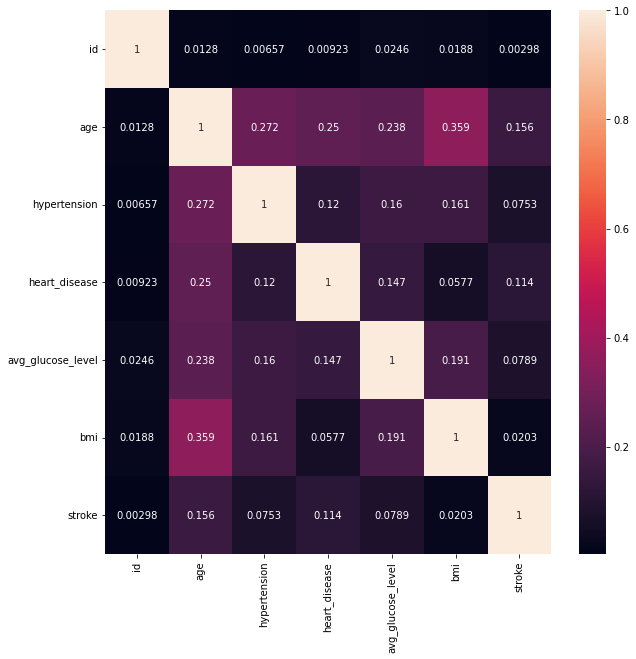

In [27]:
from matplotlib import pyplot as plt
plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt=".3g",annot_kws={"fontsize":10})

In [28]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,56543,Female,70,0,0,1,2,0,69.04,35.9,0,0
6,52800,Female,52,0,0,1,2,1,77.59,17.7,0,0
7,41413,Female,75,0,1,1,3,0,243.53,27.0,1,0
8,15266,Female,32,0,0,1,2,0,77.67,32.3,2,0
9,28674,Female,74,1,0,1,3,1,205.84,54.6,1,0


In [29]:
#train_test_split

x=df1.drop(columns=["stroke","id","gender"])
y=df1["stroke"]

from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               random_state=4,
                                               test_size=0.3)

In [30]:
!pip install imblearn

## RESAMPLING

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
y.value_counts()

0    18006
1      360
Name: stroke, dtype: int64

In [33]:
sm=SMOTE(sampling_strategy="minority")

In [34]:
x_sm,y_sm=sm.fit_resample(x,y)

In [35]:
y_sm.value_counts()

0    18006
1    18006
Name: stroke, dtype: int64

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,
                                               y_sm,
                                               random_state=4,
                                               test_size=0.3)

In [37]:
x_train.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
21100,68,1,0,1,2,0,204.054354,27.356771,1
21255,74,0,0,1,2,0,234.960868,26.124992,0
13542,34,0,0,0,3,0,91.340000,23.200000,1
28116,76,0,0,1,2,0,223.286632,39.812964,0
24110,80,0,0,1,0,0,81.208317,22.056483,0


In [38]:
y_train.head()

21100    1
21255    1
13542    0
28116    1
24110    1
Name: stroke, dtype: int64

## MODEL SELECTION

In [39]:
#sklearn models
from sklearn.neighbors import KNeighborsClassifier

In [40]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

In [41]:
#other gradient boosting
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [42]:
catboost=CatBoostClassifier(thread_count=-1,logging_level='Silent')
lightgbm=LGBMClassifier()
Knearest=KNeighborsClassifier()

In [43]:
from sklearn.metrics import classification_report


In [44]:
lightgbm.fit(x_sm,y_sm)
lig_y=lightgbm.predict(x_test)
print(classification_report(lightgbm.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5067
           1       0.95      0.90      0.92      5737

    accuracy                           0.92     10804
   macro avg       0.92      0.92      0.92     10804
weighted avg       0.92      0.92      0.92     10804



In [45]:
catboost.fit(x_sm,y_sm)
cat_y=catboost.predict(x_test)
print(classification_report(catboost.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5133
           1       0.97      0.94      0.95      5671

    accuracy                           0.95     10804
   macro avg       0.95      0.95      0.95     10804
weighted avg       0.95      0.95      0.95     10804



In [46]:
Knearest.fit(x_sm,y_sm)
kn_y=Knearest.predict(x_test)
print(classification_report(Knearest.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4737
           1       0.99      0.89      0.94      6067

    accuracy                           0.94     10804
   macro avg       0.94      0.94      0.94     10804
weighted avg       0.94      0.94      0.94     10804



In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

In [48]:
lig_auc = roc_auc_score(y_test, lig_y)
cat_auc = roc_auc_score(y_test, cat_y)
kn_auc = roc_auc_score(y_test, kn_y)

In [49]:
print('Light GBM: AUROC = %.3f' % (lig_auc))
print('Cat Boost: AUROC = %.3f' % (cat_auc))
print('K-nn : AUROC = %.3f' % (kn_auc))

Light GBM: AUROC = 0.918
Cat Boost: AUROC = 0.953
K-nn : AUROC = 0.937


In [50]:
lig_fpr, lig_tpr, _ = roc_curve(y_test, lig_y)
cat_fpr, cat_tpr, _ = roc_curve(y_test, cat_y)
kn_fpr, kn_tpr, _ = roc_curve(y_test, kn_y)

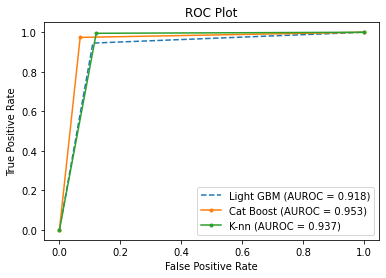

In [51]:
plt.plot(lig_fpr, lig_tpr, linestyle='--', label='Light GBM (AUROC = %.3f)' % lig_auc)
plt.plot(cat_fpr, cat_tpr, marker='.', label='Cat Boost (AUROC = %0.3f)' % cat_auc)
plt.plot(kn_fpr, kn_tpr, marker='.', label='K-nn (AUROC = %0.3f)' % kn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Test Data

In [52]:
test_data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [53]:
test_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [54]:
test_data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [55]:
male_index=test_data[test_data["gender"]=="Male"].index
other_index=test_data[test_data["gender"]=="Other"].index

In [56]:
test_data.drop(index=male_index,inplace=True)

In [57]:
test_data.drop(index=other_index,inplace=True)

In [58]:
test_data.gender.value_counts()

Female    2994
Name: gender, dtype: int64

In [59]:
test_data.isna().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  97
smoking_status        0
stroke                0
dtype: int64

In [60]:
test_data.dropna(axis=0,inplace=True )

In [61]:
test_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [62]:
test_data["ever_married"]= test_data[["ever_married"]].apply(le.fit_transform)
test_data["work_type"]= test_data[["work_type"]].apply(le.fit_transform)
test_data["Residence_type"]= test_data[["Residence_type"]].apply(le.fit_transform)
test_data["smoking_status"]= test_data[["smoking_status"]].apply(le.fit_transform)
test_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,Female,79.0,1,0,1,3,0,174.12,24.0,2,1
7,10434,Female,69.0,0,0,0,2,1,94.39,22.8,2,1
9,60491,Female,78.0,0,0,1,2,1,58.57,24.2,0,1
10,12109,Female,81.0,1,0,1,2,0,80.43,29.7,2,1


In [63]:
test_data.drop(columns="id",inplace=True)

In [64]:
test_data.drop(columns="gender",inplace=True)

In [65]:
test_data.head(1)

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,49.0,0,0,1,2,1,171.23,34.4,3,1


In [66]:
Xtest=test_data.drop(columns="stroke")
Ytest=test_data["stroke"]

In [67]:
testy=lightgbm.predict(Xtest)
print(classification_report(lightgbm.predict(Xtest),Ytest))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2688
           1       0.30      0.17      0.22       209

    accuracy                           0.91      2897
   macro avg       0.62      0.57      0.59      2897
weighted avg       0.89      0.91      0.90      2897



In [68]:
cat_Y=catboost.predict(Xtest)
print(classification_report(catboost.predict(Xtest),Ytest))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2749
           1       0.32      0.26      0.28       148

    accuracy                           0.93      2897
   macro avg       0.64      0.61      0.62      2897
weighted avg       0.93      0.93      0.93      2897



In [69]:
kn_Y=Knearest.predict(Xtest)
print(classification_report(Knearest.predict(Xtest),Ytest))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2482
           1       0.93      0.27      0.42       415

    accuracy                           0.89      2897
   macro avg       0.91      0.63      0.68      2897
weighted avg       0.90      0.89      0.87      2897



In [70]:
test_data.stroke.value_counts()

0    2777
1     120
Name: stroke, dtype: int64

In [71]:
sm=SMOTE(sampling_strategy="minority")

In [72]:
x_sm,y_sm=sm.fit_resample(x,y)

In [73]:

lig_y=lightgbm.predict(x_sm)
print(classification_report(lightgbm.predict(x_sm),y_sm))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17242
           1       0.94      0.90      0.92     18770

    accuracy                           0.92     36012
   macro avg       0.92      0.92      0.92     36012
weighted avg       0.92      0.92      0.92     36012



In [74]:
cat_y=catboost.predict(x_sm)
print(classification_report(catboost.predict(x_sm),y_sm))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     17410
           1       0.97      0.93      0.95     18602

    accuracy                           0.95     36012
   macro avg       0.95      0.95      0.95     36012
weighted avg       0.95      0.95      0.95     36012



In [75]:
kn_y=Knearest.predict(x_sm)
print(classification_report(Knearest.predict(x_sm),y_sm))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     16031
           1       0.99      0.89      0.94     19981

    accuracy                           0.94     36012
   macro avg       0.94      0.94      0.94     36012
weighted avg       0.94      0.94      0.94     36012



In [76]:
lig_auc = roc_auc_score(y_sm, lig_y)
cat_auc = roc_auc_score(y_sm, cat_y)
kn_auc = roc_auc_score(y_sm, kn_y)

In [77]:
print('Light GBM: AUROC = %.3f' % (lig_auc))
print('Cat Boost: AUROC = %.3f' % (cat_auc))
print('K-nn : AUROC = %.3f' % (kn_auc))

Light GBM: AUROC = 0.917
Cat Boost: AUROC = 0.949
K-nn : AUROC = 0.935


## Creating a pickle file for the classifier

In [78]:
import pickle

In [79]:
filename = 'Stroke.pkl'
pickle.dump(catboost.fit(x_sm,y_sm), open(filename, 'wb'))